In [2]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
n = 1000

In [4]:
rs = np.random.RandomState(125)

In [5]:
X,y = exp_tools.gen_quadrant_problem_2weak(n=n,random_state=rs)

Generating dataset with d=5,n=1000,strongly=0,weakly=2, partition of weakly=None


In [52]:
f = FRIClassification(debug=True,optimum_deviation=0.15,C=0.0025)
f.fit(X,y)

loss 584.142439811
L1 0.984122367109
offset 0.04952781382861671
C 0.0025
score 0.852752329287
coef:
[[  3.85694212e-01]
 [  3.86644422e-01]
 [  4.17099685e-02]
 [ -4.17099779e-02]
 [ -1.38997317e-15]
 [  1.82524235e-15]
 [ -9.92735913e-16]]


In [53]:
f.interval_

array([[  5.69894745e-09,   8.60030306e-01],
       [  1.11635879e-09,   8.48022574e-01],
       [  7.15380255e-13,   7.58993577e-01],
       [  7.15380255e-13,   7.58993577e-01],
       [  1.78904034e-10,   1.45297764e-01],
       [  3.47965428e-11,   1.37264371e-01],
       [  3.45887461e-12,   1.23939247e-01]])

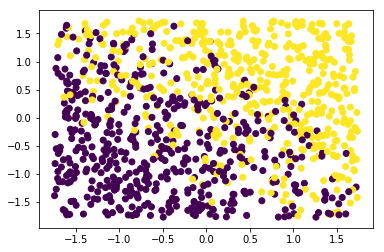

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

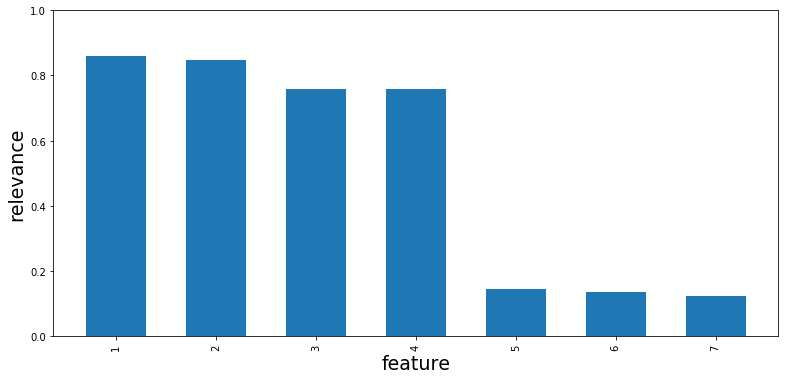

In [54]:
p = plotIntervals(f.interval_)

In [55]:
clust, link, feat_points,dist_mat = f.community_detection2(X,y)


In [56]:
import scipy
dist_mat = scipy.spatial.distance.squareform(dist_mat)

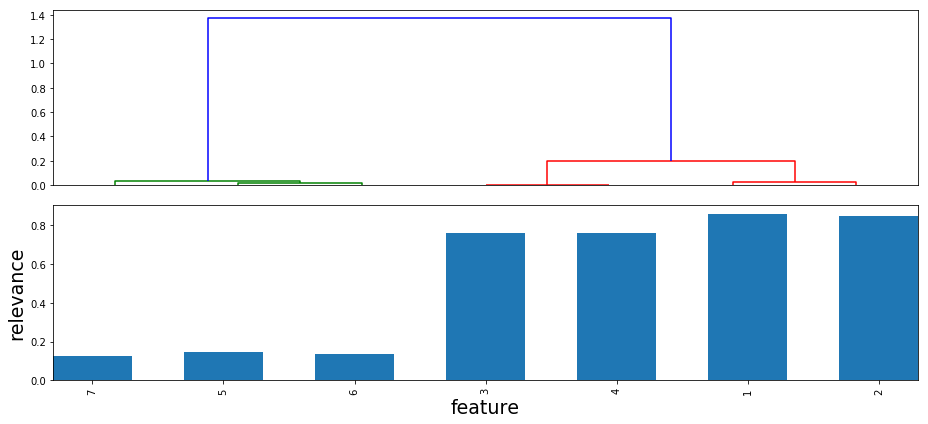

In [57]:
p = plot_dendrogram_and_intervals(f.interval_,link)

In [12]:
import pandas as pd
pd.DataFrame(X).corr()

,0,1,2,3,4,5,6
0,1.000000,0.041688,-0.013250,0.013250,0.068489,0.009713,-0.024199
1,0.041688,1.000000,0.009897,-0.009897,0.017740,0.001767,0.001497
2,-0.013250,0.009897,1.000000,-1.000000,-0.002976,0.050858,0.021815
3,0.013250,-0.009897,-1.000000,1.000000,0.002976,-0.050858,-0.021815
4,0.068489,0.017740,-0.002976,0.002976,1.000000,-0.010376,-0.000962
5,0.009713,0.001767,0.050858,-0.050858,-0.010376,1.000000,-0.047092
6,-0.024199,0.001497,0.021815,-0.021815,-0.000962,-0.047092,1.000000


In [14]:
import seaborn as sns

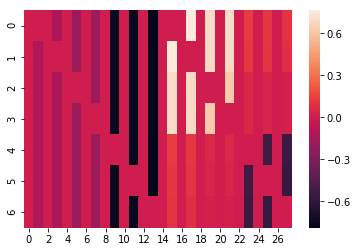

In [15]:
sns.heatmap(feat_points)

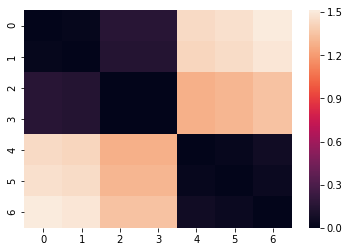

In [16]:
sns.heatmap(dist_mat)

# Distance test

In [19]:
import fri.utils

In [38]:
fri.utils.similarity2(feat_points[2],feat_points[3])

2.0524053863447112e-13

In [32]:
from scipy.spatial.distance import euclidean

In [39]:
euclidean(feat_points[2],feat_points[3])

0.9251651425164945

# Correlation based grouping

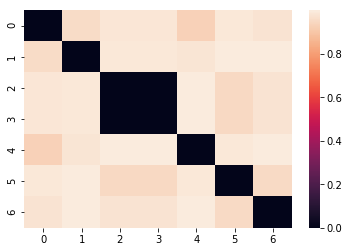

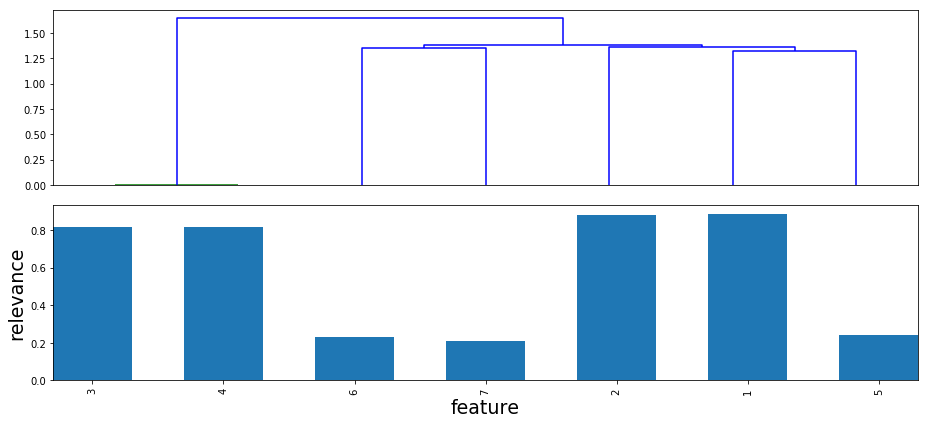

In [17]:
import pandas as pd
import seaborn as sns
corr_pd = pd.DataFrame(X).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot_dendrogram_and_intervals(f.interval_,z)